# Data Exploration Base Model

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import glob
import cv2
import os

In [2]:
images = glob.glob("H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive/*.jpg") # Daten von lokal importieren

In [3]:
data = pd.DataFrame(images, columns=['src']) # kolumnen von source-pfad ableiten

data['brand'] = data['src'].apply(lambda x : x.split('_')[0]) # _ als kolumnen split anerkennen etc. -> brand erkennen

data['brand'].value_counts().head(20) # Anzahl Autobilder pro Marke

H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Chevrolet        5079
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Toyota           4598
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Ford             4416
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\BMW              4121
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Nissan           3881
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Audi             3131
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Mercedes-Benz    3097
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Honda            2675
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Kia              2160
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Lexus            2125
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Hyundai          2091
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\GMC              2067
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Volkswagen       1752
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Subaru           1605
H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Mazda            1475
H:/ZHAW/FS

In [4]:
data['brand'] = data['src'].apply(lambda x : x.split('_')[0].split("/")[-1].split("archive\\")[-1]) # Pfad rauslöschen
data['brand'].value_counts().head(20) # Anzahl Autobilder pro Marke

Chevrolet        5079
Toyota           4598
Ford             4416
BMW              4121
Nissan           3881
Audi             3131
Mercedes-Benz    3097
Honda            2675
Kia              2160
Lexus            2125
Hyundai          2091
GMC              2067
Volkswagen       1752
Subaru           1605
Mazda            1475
Dodge            1345
Porsche          1344
Lincoln          1324
Cadillac         1311
Volvo            1231
Name: brand, dtype: int64

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64467 entries, 0 to 64466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   src     64467 non-null  object
 1   brand   64467 non-null  object
dtypes: object(2)
memory usage: 1007.4+ KB
None


### Auswahl von 10 Marken

In [6]:
data = data[(data['brand']=='Volkswagen')|(data['brand']=='Toyota')|(data['brand']=='Ford')|(data['brand']=='BMW')|(data['brand']=='Nissan')|(data['brand']=='Audi')|(data['brand']=='Mercedes-Benz')|(data['brand']=='Honda')|(data['brand']=='Kia')|(data['brand']=='Volvo')].reset_index(drop=True)
data

,src,brand
0,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Au...,Audi
1,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Au...,Audi
2,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Au...,Audi
3,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Au...,Audi
4,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Au...,Audi
...,...,...
31057,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Vo...,Volvo
31058,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Vo...,Volvo
31059,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Vo...,Volvo
31060,H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive\Vo...,Volvo


In [7]:
data['brand'].value_counts().head(20)

Toyota           4598
Ford             4416
BMW              4121
Nissan           3881
Audi             3131
Mercedes-Benz    3097
Honda            2675
Kia              2160
Volkswagen       1752
Volvo            1231
Name: brand, dtype: int64

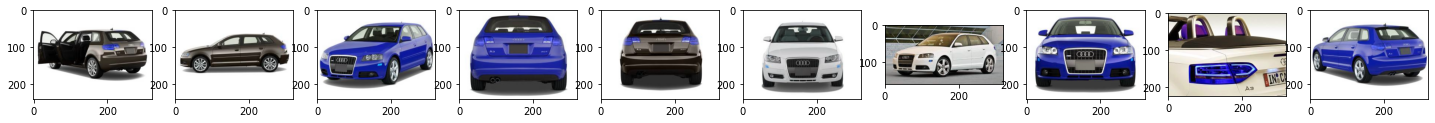

In [8]:
X= []
y= []
for i in range(len(data)):
    src = data.loc[i,'src']
    src = cv2.imread(src, cv2.IMREAD_COLOR)
    X.append(src)
    y.append(data.loc[i,'brand'])
    
fig, axes = plt.subplots(1,10,figsize=(25,10))
for i in range(0,10):
    axes[i].imshow(X[i])
    

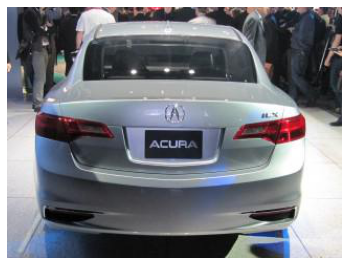

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img)

In [10]:
from PIL import Image

#Load the image
img = Image.open('H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)

JPEG
RGB
(320, 240)


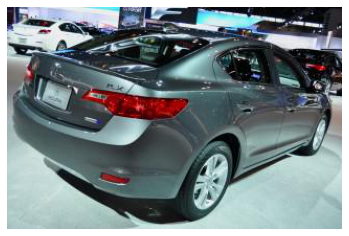

In [11]:
img2 = mpimg.imread('H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Bbw.jpg')
plt.figure(figsize=(6,6))
plt.axis('off')
imgplot = plt.imshow(img2)

In [12]:
img = Image.open('H:/ZHAW/FS 2021/ADS/Semesterprojekt/archive/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_Bbw.jpg')

#Get basic details about the image
print(img.format)
print(img.mode)
print(img.size)

JPEG
RGB
(320, 212)


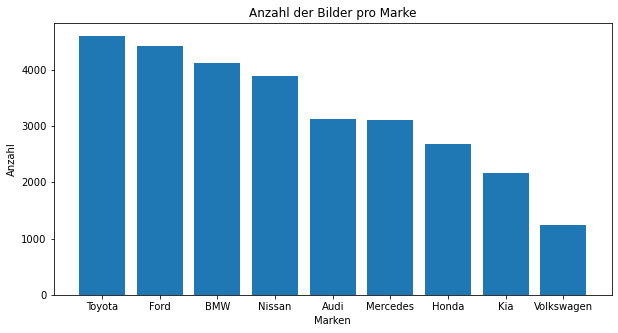

In [87]:
data = [4598,4416,4121,3881,3131,3097,2675,2160,1231]
labels = ['Toyota', 'Ford', 'BMW', 'Nissan', 'Audi','Mercedes', 'Honda', 'Kia', 'Volkswagen', 'Volvo']
plt.xticks(range(len(data)), labels)
plt.xlabel('Marken')
plt.ylabel('Anzahl')
plt.title('Anzahl der Bilder pro Marke')
plt.bar(range(len(data)), data) 
plt.rcParams["figure.figsize"] = (10,2)
plt.show()